In [ ]:
%load_ext autoreload

%autoreload 2

import os
os.chdir('..')

from lucifex.sim import Simulation, integrate
from lucifex.viz import plot_line, plot_colormap, plot_mesh

from simulate import carbon_dissolution
from postprocess_plots_many_to_one import plot_colormap_comparison, plot_timeseries


cell = ('quadrilateral', 'left', 'right', 'left_right', 'right_left', 'crossed')
simulation: dict[str, Simulation] = {}
sim_func = carbon_dissolution(store_step=0.01)

for c in cell:
    sim = sim_func(cell=c, Ra=500.0, Da=100.0, Nx=100, Ny=100, c_bounds=(True, True))
    integrate(sim, n_stop=200, dt_init=1e-6, n_init=5)
    simulation[c] = sim

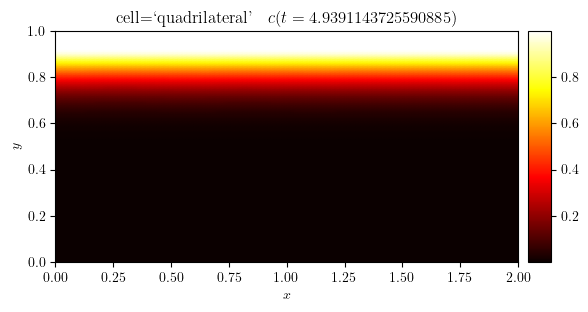

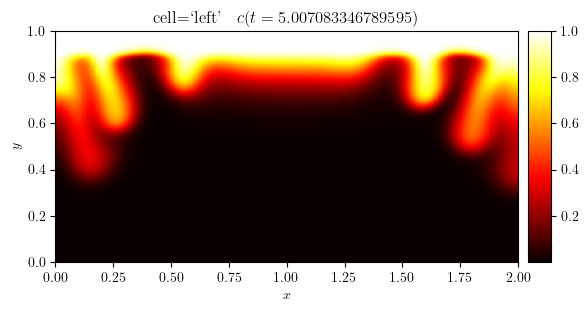

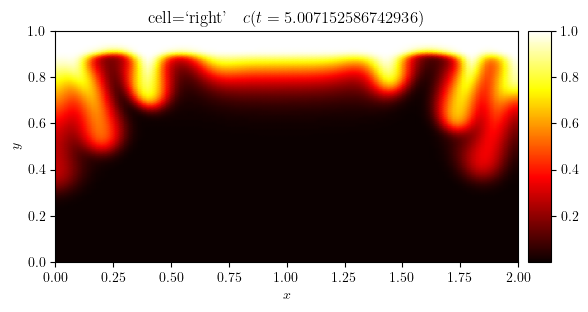

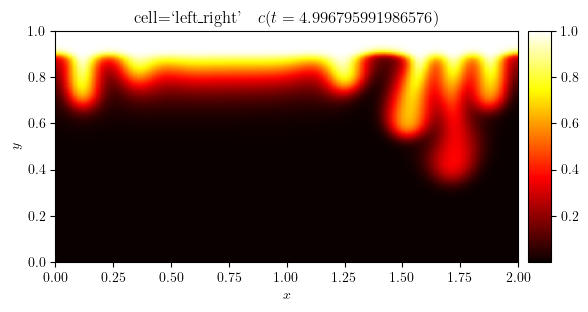

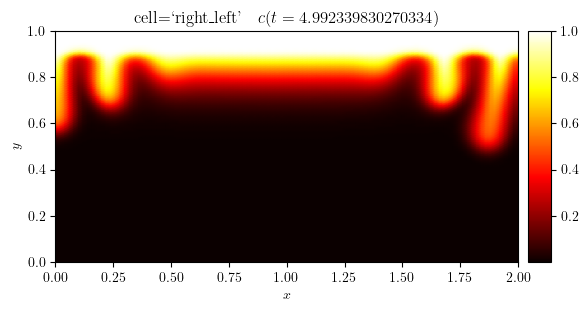

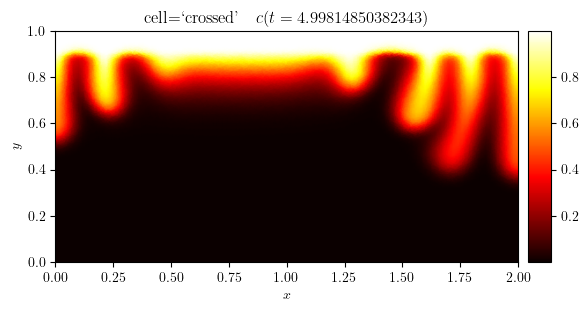

In [4]:
plot_colormap_comparison(
    [i['c'] for i in simulation.values()],
    t=5.0,
    labels=[f"cell=`{c}'" for c in cell],
)
pass

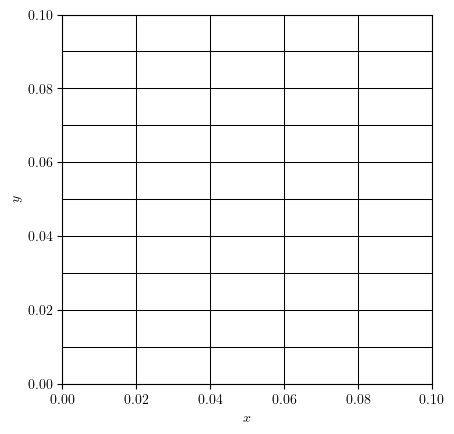

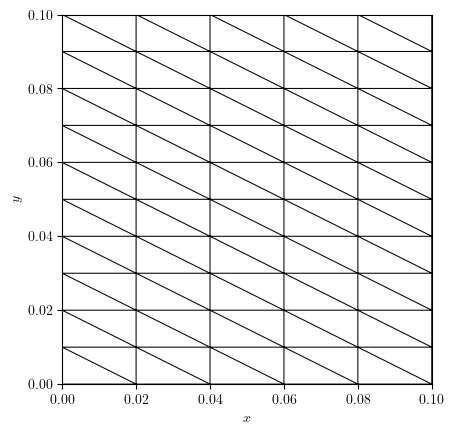

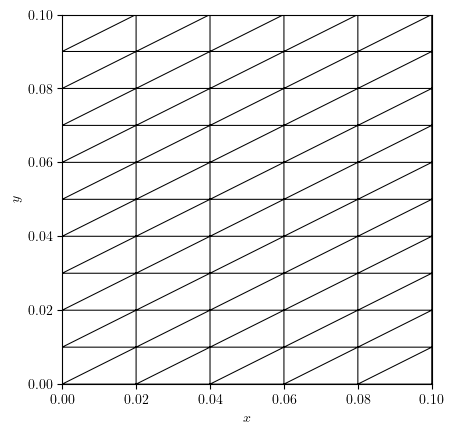

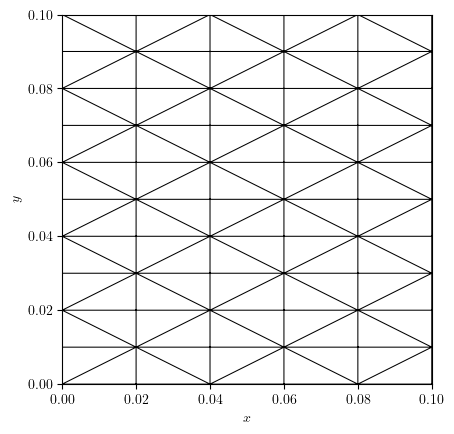

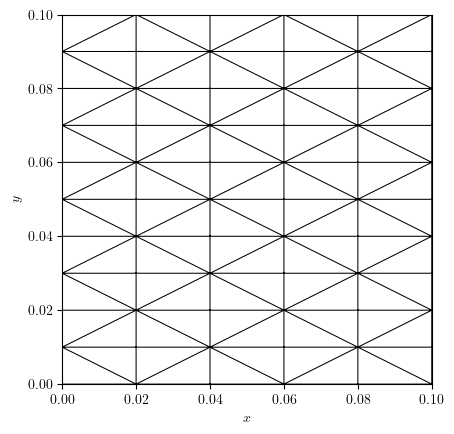

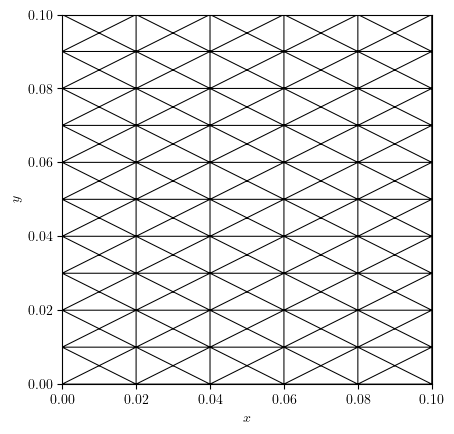

: 

In [ ]:
from lucifex.viz import plot_mesh

for i in simulation.values():
    fig, ax = plot_mesh(i['c'].mesh) 
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 0.1)